# Задание 1. Алгебраическое уравнение 

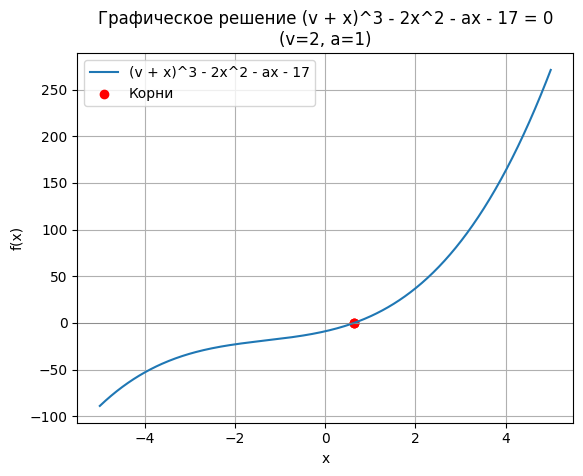

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root


def equation(x, v, a):
    return (v + x) ** 3 - 2 * x ** 2 - a * x - 17


v = 2
a = 1

# Create an array of x values
x_vals = np.linspace(-5, 5, 400)

root_solutions = []
for guess in [-5, 0, 5]:
    sol = root(equation, guess, args=(v, a))
    if sol.success:
        root_solutions.append(sol.x[0])

y_vals = equation(x_vals, v, a)

plt.plot(x_vals, y_vals, label='(v + x)^3 - 2x^2 - ax - 17')
plt.axhline(0, color='gray', lw=0.5)
plt.scatter(root_solutions, [0] * len(root_solutions), color='red', label='Корни')

plt.title(f"Графическое решение (v + x)^3 - 2x^2 - ax - 17 = 0\n(v={v}, a={a})")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()

# Задание 2 Корни алгебраическог полинома

In [ ]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt


# Определим функцию многочлена
def poly_eq(x, a, gamma, theta, mu, nu):
    return a * x ** 3 - (gamma + theta) * x ** 2 - mu * x + nu


# Зададим параметры a, gamma, theta, mu, nu
a = 1
gamma = 2
theta = 1
mu = -3
nu = 1

# Найдем корни с помощью fsolve для начальных приближений
initial_guesses = [-3, 0, 3]
roots = fsolve(poly_eq, initial_guesses, args=(a, gamma, theta, mu, nu))

# Для графического решения создадим массив значений x
x_vals = np.linspace(-5, 5, 400)

# Вычислим значения многочлена для этих x
y_vals = poly_eq(x_vals, a, gamma, theta, mu, nu)

# Построим график функции и отметим корни
plt.plot(x_vals, y_vals, label=f'{a}x^3 - ({gamma}+{theta})x^2 - {mu}x + {nu}')
plt.axhline(0, color='gray', lw=0.5)
plt.scatter(roots, [0] * len(roots), color='red', label='Корни')

# Настройки графика
plt.title(f"Графическое решение уравнения {a}x^3 - ({gamma}+{theta})x^2 - {mu}x + {nu} = 0")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()


# Задание 3.  Система линейных уравнений

In [ ]:
# Определим систему уравнений
def system_eqs(vars, alpha, beta, gamma, mu, nu):
    x1, x2, x3, x4 = vars
    eq1 = 3 * x1 + x2 + x3 + gamma * x4 - alpha
    eq2 = x1 - mu * x2 + nu * x3 + 4 * x4 - beta
    eq3 = -5 * x1 - x3 - 7 * x4 + 5
    eq4 = x1 - 6 * x2 + alpha * x3 + 6 * x4 - 3
    return [eq1, eq2, eq3, eq4]


# Зададим параметры
alpha = 1
beta = 2
gamma = 3
mu = 4
nu = 5

# Найдем решение системы с помощью fsolve
initial_guesses = [1, 1, 1, 1]  # начальные приближения
solution = fsolve(system_eqs, initial_guesses, args=(alpha, beta, gamma, mu, nu))

solution


# Задание 4. Система линеных уравнений  с root()

In [ ]:
from scipy.optimize import root


# Определим систему уравнений
def system_eqs_root(vars, beta, gamma, nu, alpha, u):
    x1, x2, x3, x4 = vars
    eq1 = beta * x1 + gamma * x2 + nu * x3 + x4 - (10 * u + nu)
    eq2 = x1 - 3 * u * x2 + 2 * x3 + 4 * alpha * x4 - gamma - 9
    eq3 = -5 * x1 + nu * x2 - x3 - 7 * x4 + 5
    eq4 = nu * x1 - 6 * x2 + 2 * x3 + 6 * x4 - u
    return [eq1, eq2, eq3, eq4]


# Зададим параметры
beta = 1
gamma = 2
nu = 3
alpha = 4
u = 5

# Найдем решение системы с помощью root
initial_guesses = [1, 1, 1, 1]  # начальные приближения
solution_root = root(system_eqs_root, initial_guesses, args=(beta, gamma, nu, alpha, u))

solution_root.x, solution_root.success


# Задание 5. Система нелинейных уравнений. 

In [ ]:
# Определим систему нелинейных уравнений
def nonlinear_system(vars):
    x, y = vars
    eq1 = 3*np.log(x) + y*np.sin(x) + y**2 - 12
    eq2 = x / (y**2 + 1) + 2**x - 3*y**2 - 22
    return [eq1, eq2]

# Найдем решение системы с помощью fsolve
initial_guess = [2, 2]  # начальные приближения
solution = fsolve(nonlinear_system, initial_guess)

# Для визуализации создадим массивы значений x и y
x_vals = np.linspace(0.1, 5, 400)  # x > 0
y_vals = np.linspace(0.1, 3, 400)

# Создадим сетку для значений x и y
X, Y = np.meshgrid(x_vals, y_vals)

# Вычислим значения функций на сетке для графиков
Z1 = 3*np.log(X) + Y*np.sin(X) + Y**2 - 12
Z2 = X / (Y**2 + 1) + 2**X - 3*Y**2 - 22

# Построим графики
plt.figure(figsize=(10, 6))
contour1 = plt.contour(X, Y, Z1, levels=[0], colors='blue')
contour2 = plt.contour(X, Y, Z2, levels=[0], colors='red')
plt.scatter(solution[0], solution[1], color='green', label=f'Solution: (x={solution[0]:.2f}, y={solution[1]:.2f})')

# Подписи для контуров
plt.clabel(contour1, fmt='Eq1: 3ln(x) + ysin(x) + y^2 = 12')
plt.clabel(contour2, fmt='Eq2: x/(y^2 + 1) + 2^x - 3y^2 = 22')

# Настроим легенду и оси
plt.title('Графическое решение системы нелинейных уравнений')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


solution
